In [569]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns

# Pandas
pd.set_option("display.max_rows",100)
pd.set_option('display.max_columns', 50)

# Matplotlib
%matplotlib inline
mpl.rcParams['figure.figsize'] = (20, 8)

In [570]:
cereals = pd.read_csv('../data/pycon.csv')
cereals = cereals.set_index('cf_index')

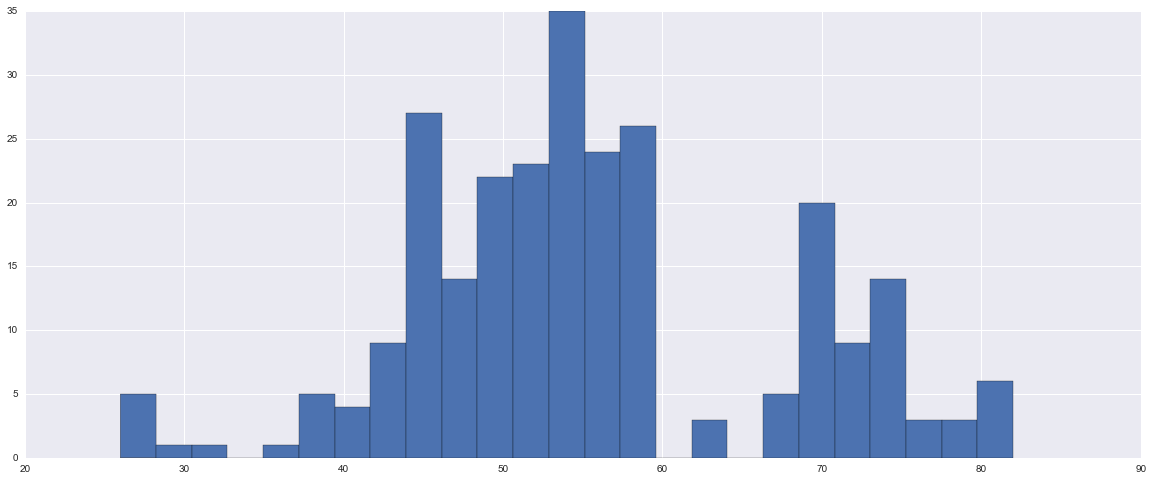

In [571]:
cereals.cf_score.hist(bins=25);

In [572]:
cereals['healthy'] = (cereals.cf_score >  60).astype(int)

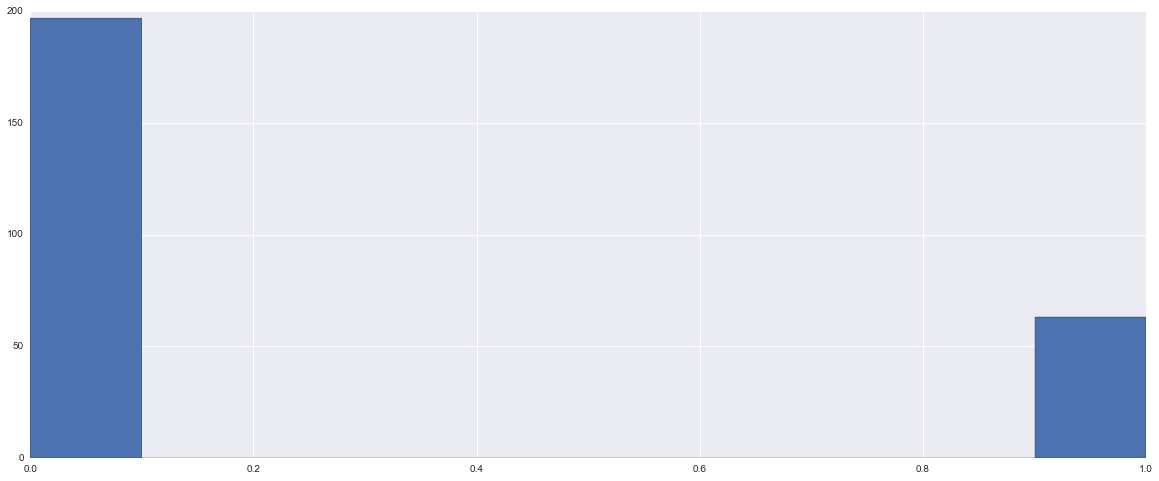

In [573]:
cereals['healthy'].hist();

## Colour Mean, Standard Deviation

## Histograms

### Greyscale

### RGB

## Dominant Colours

## Intensity

## Colour Wheel

## White Background

# Machine Learning

## Spokes Characters

## Gaze Detection

## Modeling

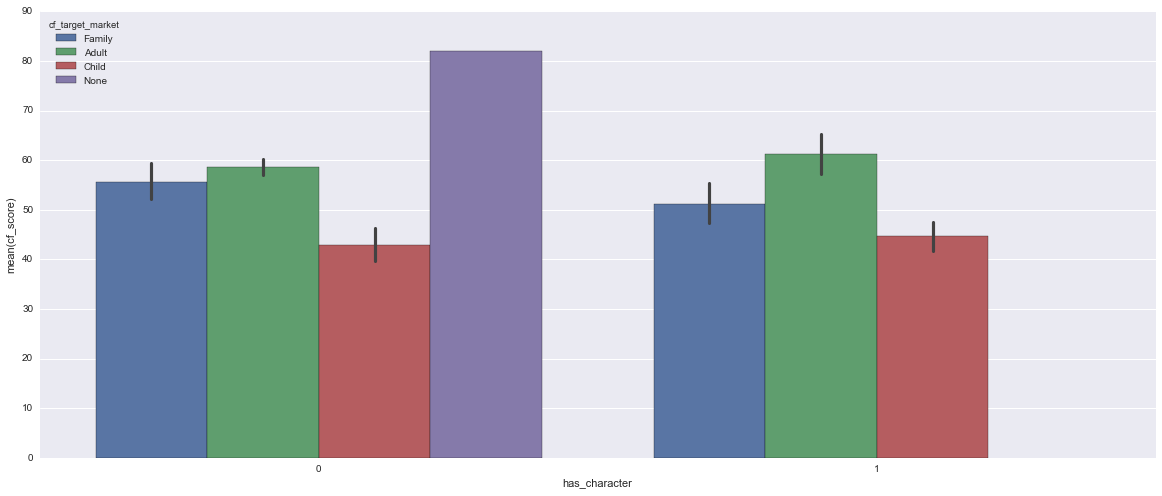

In [574]:
sns.barplot(x="has_character", y="cf_score", hue='cf_target_market', data=cereals, order=[0,1]);

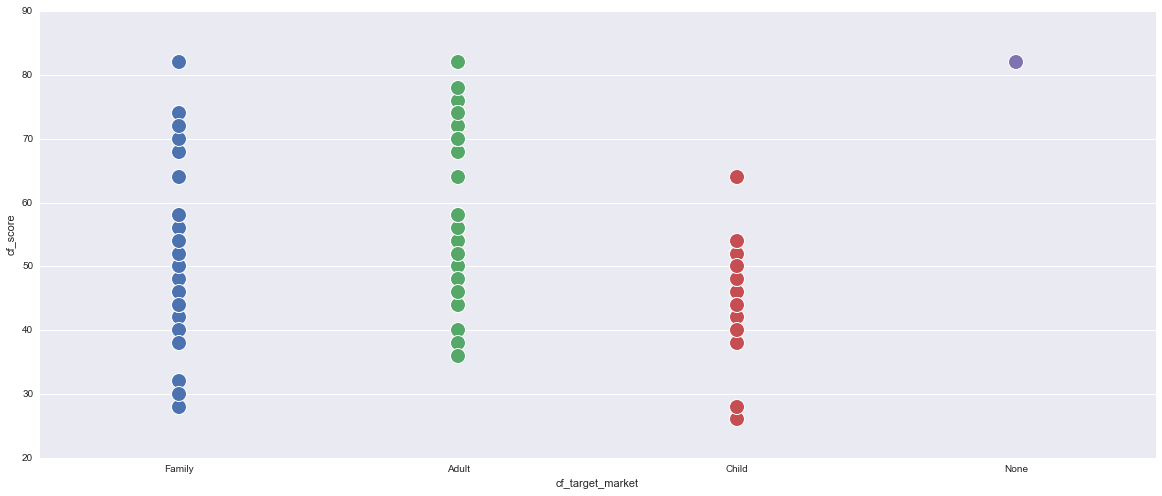

In [617]:
sns.stripplot(x="cf_target_market", y="cf_score", size=15, data=cereals);

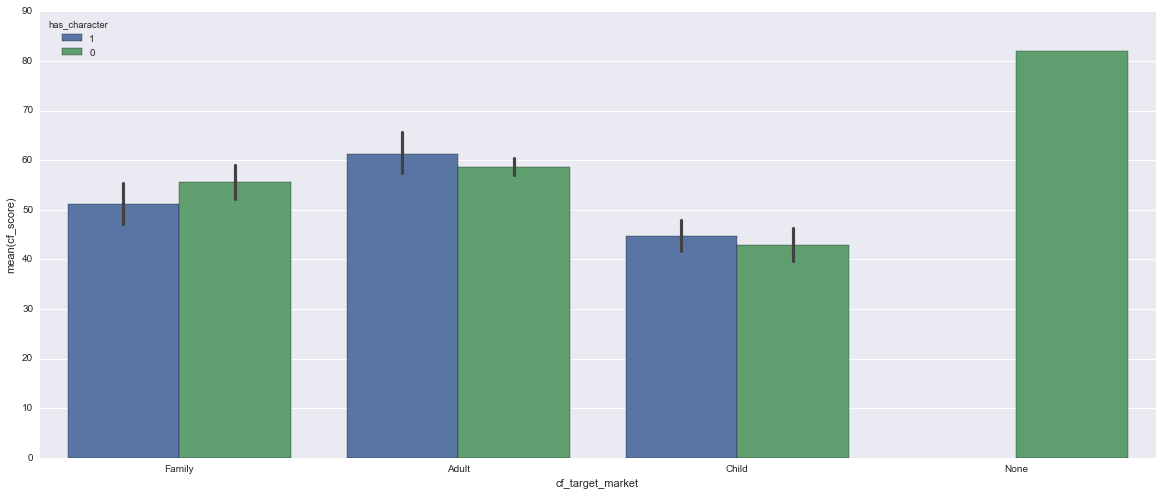

In [576]:
sns.barplot(x="cf_target_market", y="cf_score", hue='has_character', data=cereals);

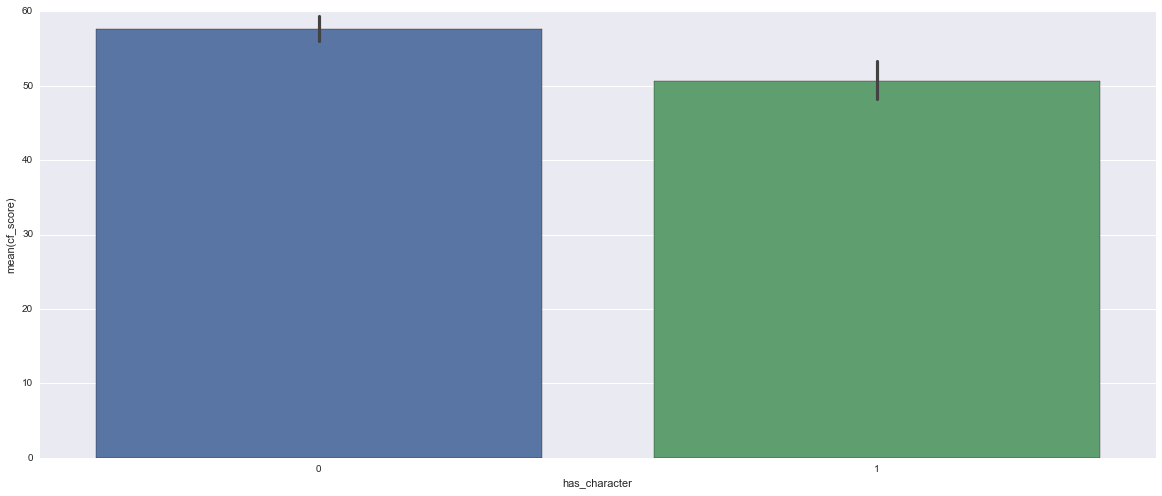

In [619]:
sns.barplot(x="has_character", y="cf_score", data=cereals, order=[0,1]);

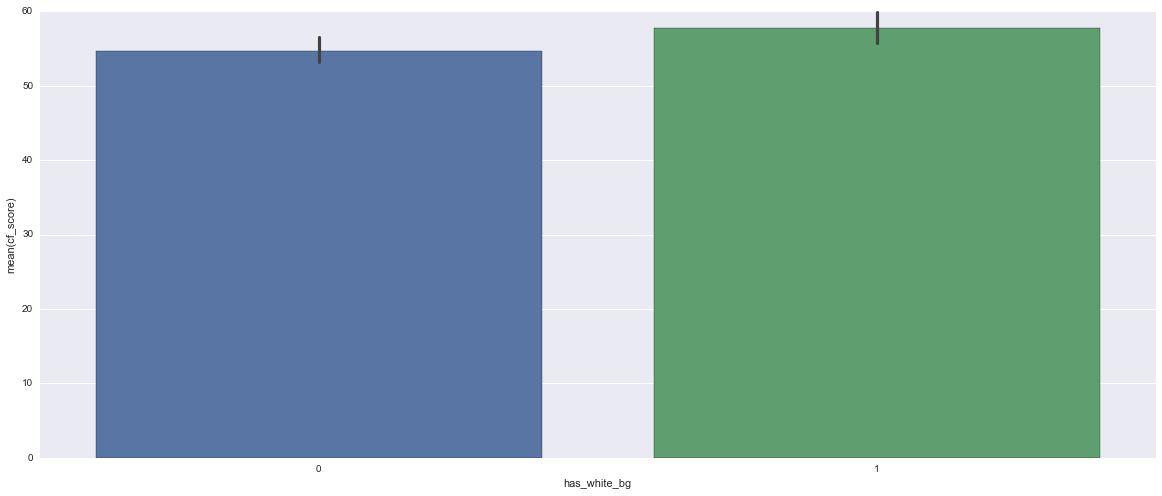

In [620]:
sns.barplot(x="has_white_bg", y="cf_score", data=cereals, order=[0,1]);

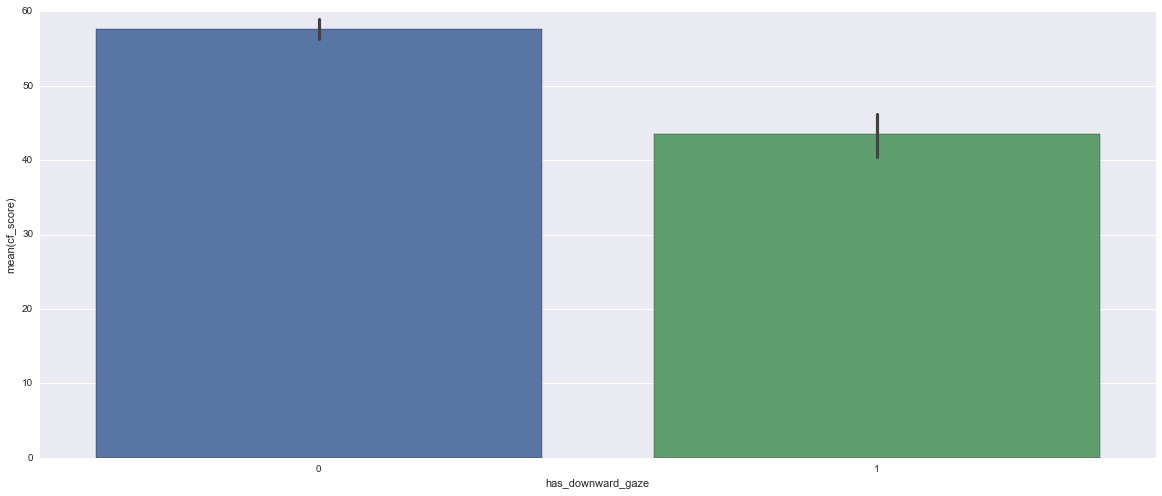

In [633]:
sns.barplot(x="has_downward_gaze", y="cf_score", data=cereals, order=[0,1]);

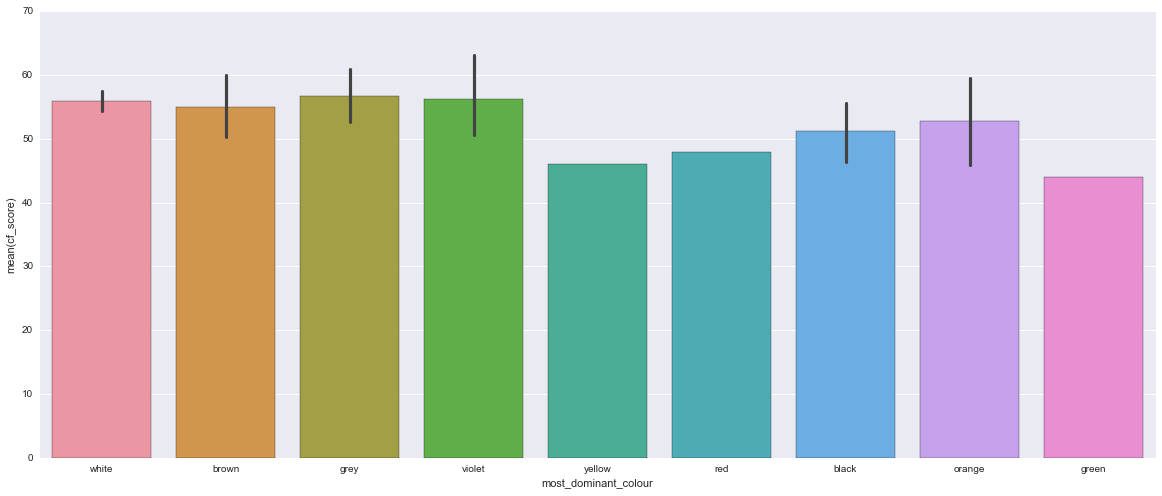

In [631]:
sns.barplot(x="most_dominant_colour", y="cf_score", data=cereals);

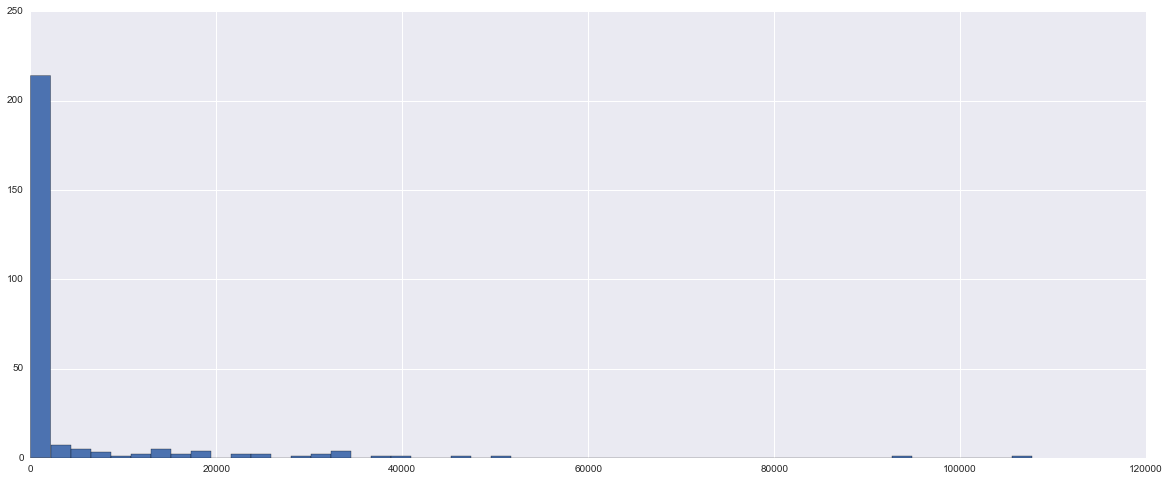

In [638]:
cereals.most_frequent_colour_count.hist(bins=50);

In [640]:
cereals.most_frequent_colour_count.mean()

4051.9461538461537

In [647]:
(cereals.most_frequent_colour_count > 1000).sum()

58

In [ ]:
sns.barplot(x="most_dominant_colour", y="cf_score", data=cereals);

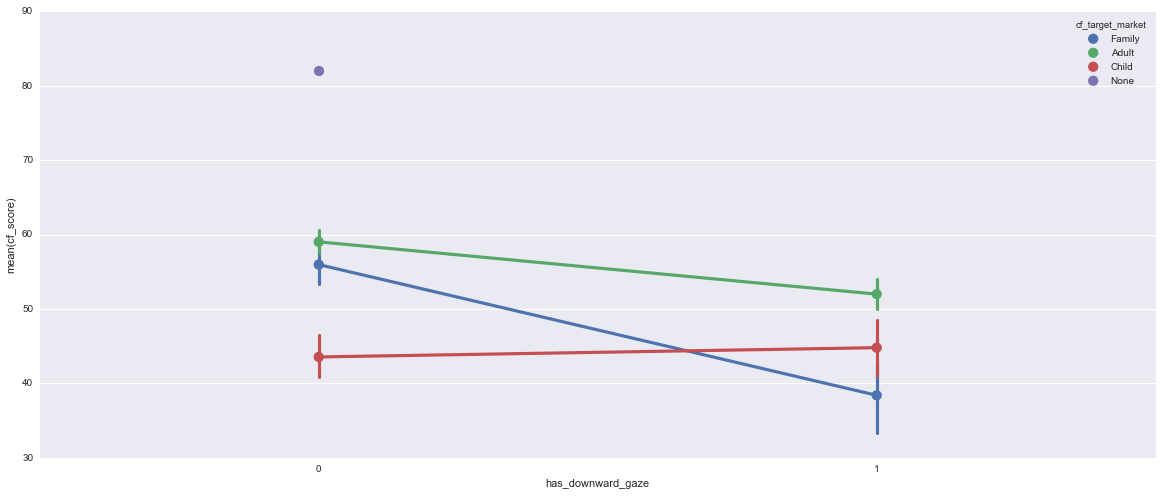

In [578]:
sns.pointplot(x="has_downward_gaze", y="cf_score", hue='cf_target_market', data=cereals);

### Cleaning Data

In [579]:
cereals[cereals.cf_target_market == 'None']

,cf_score,cf_target_market,cf_serving_size,cf_sugar_result,cf_fiber_result,cf_sodium_result,cf_sugar_per_serving,cf_fiber_per_serving,cf_sodium_per_serving,cf_calories_per_serving,has_white_bg,has_character,has_downward_gaze,greyscale_peak,b_mean,g_mean,r_mean,b_sd,g_sd,r_sd,most_frequent_colour,most_frequent_colour_count,most_dominant_colour,url,cover_image_url,fn,fn_cropped,company,healthy
cf_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
172,82,None,19,0%,5%,0,0,1,0,70,1,0,0,255,194.23,197.81,207.99,82.38,79.5,67.29,#ffffff,51273,white,http://cerealfacts.org/cereal_nutrition_scores...,http://cerealfacts.org/media/cereal_images/Kas...,img_172_kashipuffs7wholegrainspuffs.jpg,img_172_kashipuffs7wholegrainspuffs_cropped.png,Kashi,1


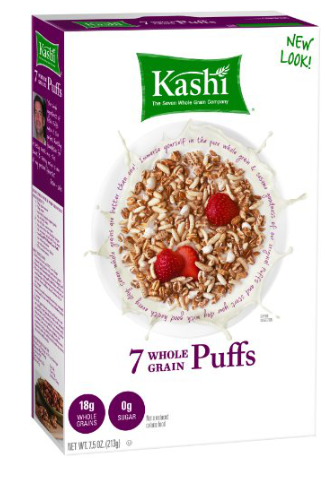

In [580]:
img = mpimg.imread('../img/' + cereals.ix[172].fn)

plt.grid(None)
plt.axis('off')
imgplot = plt.imshow(img)

In [581]:
cereals.ix[172, 'cf_target_audience'] = 'Adult'

In [582]:
cereals = cereals.join(pd.get_dummies(cereals.cf_target_market.str.lower(), prefix='is'))
target_audience = ['is_adult', 'is_child', 'is_family', 'is_none']

In [583]:
cereals = cereals.join(pd.get_dummies(cereals.company.str.replace("'",'').str.replace(" ",'').str.lower(), prefix='is'))
companies = ['is_annies','is_barbarasbakery','is_cascadianfarms','is_generalmills','is_kashi', 'is_kellogg',
             'is_naturespath','is_newmansown','is_peacecereal','is_post', 'is_quaker']

In [584]:
cereals.healthy.value_counts()

0    197
1     63
Name: healthy, dtype: int64

In [585]:
import random

min_class = cereals.healthy.value_counts().idxmin()
max_class = cereals.healthy.value_counts().idxmax()
min_class_count = sum(cereals.healthy == min_class)
max_class_count = sum(cereals.healthy == max_class)

min_idx = cereals[cereals.healthy == min_class].index.tolist()
max_sample_idx = random.sample(cereals[cereals.healthy == max_class].index, min_class_count)

balanced_cereals = cereals.ix[min_idx + max_sample_idx]

In [586]:
len(balanced_cereals)

126

In [587]:
# feat = ['has_character','has_white_bg','has_downward_gaze'] + balanced_cereals.loc[:,'is_adult':].index.to_list()

X = balanced_cereals[feat]
y = balanced_cereals.cf_score.values

In [588]:
X

,has_character,has_white_bg,has_downward_gaze,is_adult,is_child,is_family,is_none,is_annies,is_barbarasbakery,is_cascadianfarms,is_generalmills,is_kashi,is_kellogg,is_naturespath,is_newmansown,is_peacecereal,is_post,is_quaker
cf_index,,,,,,,,,,,,,,,,,,
4,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
12,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
17,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
19,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
20,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
21,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
23,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
24,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [589]:
from sklearn.metrics import r2_score
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import ExtraTreesClassifier as ETC
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.metrics import confusion_matrix

est = ETC(n_estimators=150,  max_features='auto',
                            min_samples_split=5)


# est = ABC(n_estimators=150)

est.fit(X, y)

y_hat = est.predict(X)

print cross_val_score(est, X, y, cv=5).mean()
print cross_val_score(est, X, y, cv=5).std()

0.226731601732
0.0899714581946


/home/io/.tools/anaconda/envs/ds/lib/python2.7/site-packages/sklearn/cross_validation.py:417: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


In [590]:
confusion_matrix(y, y_hat)

array([[ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  1,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  1,  0,
         0,  0,

In [591]:
from sklearn import linear_model



# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X, y)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X) - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X, y))


('Coefficients: \n', array([  8.11311571,  -5.48517568, -17.71321997,   0.84294433,
       -12.62429561,  -3.08914252,  14.87049381,  -9.76408448,
         3.53269441,   0.50212006,  -1.39185349,  10.87457058,
         4.79939954,  -1.40516492,  -9.362838  ,   4.33069149,
         3.22639602,  -5.3419312 ]))
Residual sum of squares: 94.21
Variance score: 0.41


In [592]:
select = cereals[(cereals.cf_score < 60) & (cereals.has_character == False)].index.tolist()
char_select = cereals[(cereals.cf_score < 60) & (cereals.has_character == True)].index.tolist()
healthy_select = cereals[(cereals.cf_score >= 60)].index.tolist()

noise_select = random.sample(select, 22)

dfx = cereals.ix[char_select + healthy_select + noise_select]

In [605]:
feat = ['has_character',
 'has_white_bg',
 'has_downward_gaze',
 'is_adult',
 'is_child',
 'is_family']

feat = ['has_character',
 'has_white_bg',
 'has_downward_gaze']

X = dfx[feat]
y = dfx.cf_score.values

In [606]:
from sklearn.metrics import r2_score
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import ExtraTreesClassifier as ETC
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.metrics import confusion_matrix

est = RFR(n_estimators=150,  max_features='auto',
                            min_samples_split=5)


# est = ABC(n_estimators=150)

est.fit(X, y)

y_hat = est.predict(X)

print cross_val_score(est, X, y, cv=5).mean()
print cross_val_score(est, X, y, cv=5).std()

-3.82725176363
2.64931656665


In [609]:
from sklearn import linear_model


# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X, y)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X) - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X, y))

('Coefficients: \n', array([ -8.93588577,   1.47958643, -13.87255954]))
Residual sum of squares: 101.27
Variance score: 0.47


# AWARDS

In [597]:
has_character = cereals.has_character 
cereals[has_character]

,cf_target_market,cf_target_market,cf_target_market,cf_target_market,cf_target_market,cf_target_market,cf_target_market,cf_target_market,cf_target_market,cf_target_market,cf_target_market,cf_target_market,cf_score,cf_score,cf_score,cf_score,cf_score,cf_score,cf_score,cf_score,cf_score,cf_score,cf_score,cf_score,cf_score,...,cf_score,cf_score,cf_score,cf_score,cf_score,cf_score,cf_score,cf_target_market,cf_target_market,cf_target_market,cf_target_market,cf_target_market,cf_target_market,cf_target_market,cf_target_market,cf_target_market,cf_target_market,cf_target_market,cf_target_market,cf_target_market,cf_target_market,cf_target_market,cf_target_market,cf_target_market,cf_target_market
cf_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,50,50,50,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family
2,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,52,52,52,52,52,52,52,52,52,52,52,52,52,...,52,52,52,52,52,52,52,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family
3,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,50,50,50,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family
4,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,64,64,64,64,64,64,64,64,64,64,64,64,64,...,64,64,64,64,64,64,64,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family
5,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,58,58,58,58,58,58,58,58,58,58,58,58,58,...,58,58,58,58,58,58,58,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family
6,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,54,54,54,54,54,54,54,54,54,54,54,54,54,...,54,54,54,54,54,54,54,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family
7,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,56,56,56,56,56,56,56,56,56,56,56,56,56,...,56,56,56,56,56,56,56,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family
8,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,68,68,68,68,68,68,68,68,68,68,68,68,68,...,68,68,68,68,68,68,68,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family
9,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,46,46,46,46,46,46,46,46,46,46,46,46,46,...,46,46,46,46,46,46,46,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family,Family


In [624]:
cereals.most_dominant_colour

cf_index
1       white
2       brown
3       brown
4       brown
5        grey
6        grey
7        grey
8        grey
9        grey
10       grey
11     violet
12       grey
13       grey
14       grey
15       grey
16       grey
17       grey
18       grey
19       grey
20       grey
21       grey
22       grey
23       grey
24       grey
25       grey
26      white
27      white
28      white
29      white
30      white
31      white
32      white
33      white
34      white
35      white
36      white
37      white
38      white
39      white
40      white
41      white
42      white
43       grey
44      white
45     yellow
46      white
47        red
48      white
49       grey
50      white
        ...  
211    orange
212     white
213     brown
214     brown
215     brown
216      grey
217      grey
218      grey
219     white
220     brown
221     white
222     brown
223     white
224     brown
225    orange
226     brown
227     brown
228     white
229     white
230    viol

In [685]:
healthy = cereals.healthy == True
has_character = cereals.has_character == True
has_downward_gaze = cereals.has_downward_gaze == True
yellow_colour = cereals.most_dominant_colour == 'yellow'
gray_colour = cereals.most_dominant_colour == 'grey'
has_white_bg = cereals.has_white_bg == True

In [691]:
cereals[(healthy == False) & (has_character == False) & (has_white_bg)].sort('cf_score')

/home/io/.tools/anaconda/envs/ds/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,cf_score,cf_target_market,cf_serving_size,cf_sugar_result,cf_fiber_result,cf_sodium_result,cf_sugar_per_serving,cf_fiber_per_serving,cf_sodium_per_serving,cf_calories_per_serving,has_white_bg,has_character,has_downward_gaze,greyscale_peak,b_mean,g_mean,r_mean,b_sd,g_sd,r_sd,most_frequent_colour,most_frequent_colour_count,most_dominant_colour,url,cover_image_url,fn,fn_cropped,company,healthy,cf_target_audience,is_adult,is_child,is_family,is_none,is_annies,is_barbarasbakery,is_cascadianfarms,is_generalmills,is_kashi,is_kellogg,is_naturespath,is_newmansown,is_peacecereal,is_post,is_quaker
cf_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
143,36,Adult,31,29%,10%,581,9,3,180,120,1,0,0,255,133.12,147.03,193.31,78.08,74.72,53.83,#ea1b35,256,white,http://cerealfacts.org/cereal_nutrition_scores...,http://cerealfacts.org/media/cereal_images/Kel...,img_143_kelloggspecialkchocolateydelight.jpg,img_143_kelloggspecialkchocolateydelight_cropp...,Kellogg,0,NaN,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
148,44,Adult,31,13%,0%,710,4,0,220,120,1,0,0,242,190.13,192.33,217.19,66.07,65.72,33.83,#e02948,140,white,http://cerealfacts.org/cereal_nutrition_scores...,http://cerealfacts.org/media/cereal_images/Kel...,img_148_kelloggspecialkregular.jpg,img_148_kelloggspecialkregular_cropped.png,Kellogg,0,NaN,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
232,46,Adult,55,18%,4%,600,10,2,330,230,1,0,0,207,129.17,150.10,179.42,88.13,69.09,34.03,#cdd0d5,142,white,http://cerealfacts.org/cereal_nutrition_scores...,http://cerealfacts.org/media/cereal_images/Pea...,img_232_peacemangopassion.jpg,img_232_peacemangopassion_cropped.png,Peace Cereal,0,NaN,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
173,46,Adult,32,28%,3%,531,9,1,170,120,1,0,0,255,163.90,174.62,198.13,82.06,77.37,55.84,#ffffff,22720,white,http://cerealfacts.org/cereal_nutrition_scores...,http://cerealfacts.org/media/cereal_images/Kas...,img_173_kashistrawberryfields.jpg,img_173_kashistrawberryfields_cropped.png,Kashi,0,NaN,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
51,46,Family,30,30%,7%,600,9,2,180,120,1,0,0,231,167.29,160.51,171.94,59.93,59.74,57.01,#dfdde0,234,white,http://cerealfacts.org/cereal_nutrition_scores...,http://cerealfacts.org/media/cereal_images/GMC...,img_051_gmcheeriosyogurtburststrawberry.jpg,img_051_gmcheeriosyogurtburststrawberry_croppe...,General Mills,0,NaN,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
147,48,Adult,31,29%,10%,613,9,3,190,110,1,0,0,225,143.93,145.73,204.83,90.53,86.47,54.63,#efe6e7,3072,white,http://cerealfacts.org/cereal_nutrition_scores...,http://cerealfacts.org/media/cereal_images/Kel...,img_147_kelloggspecialkredberries.jpg,img_147_kelloggspecialkredberries_cropped.png,Kellogg,0,NaN,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
34,48,Adult,55,20%,15%,655,11,8,360,200,1,0,0,218,154.74,171.48,177.42,71.24,55.24,44.43,#d5dde0,461,white,http://cerealfacts.org/cereal_nutrition_scores...,http://cerealfacts.org/media/cereal_images/CFH...,img_034_cfheartymorning.jpg,img_034_cfheartymorning_cropped.png,Cascadian Farms,0,NaN,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
139,48,Adult,50,28%,6%,560,14,3,280,180,1,0,0,255,178.50,181.95,189.88,79.31,66.97,61.88,#ffffff,13057,white,http://cerealfacts.org/cereal_nutrition_scores...,http://cerealfacts.org/media/cereal_images/Kel...,img_139_kelloggsmartstartoriginalantioxidants.jpg,img_139_kelloggsmartstartoriginalantioxidants_...,Kellogg,0,NaN,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
26,50,Family,27,30%,11%,389,8,3,105,110,1,0,0,255,166.53,193.34,210.86,80.12,55.24,51.50,#ffffff,33899,white,http://cerealfacts.org/cereal_nutrition_scores...,http://cerealfacts.org/media/cereal_images/CFC...,img_026_cfcinnamoncrunch.jpg,img_026_cfcinnamoncrunch_cropped.png,Cascadian Farms,0,NaN,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [672]:
cereals[cereals.cf_score == 28]

,cf_score,cf_target_market,cf_serving_size,cf_sugar_result,cf_fiber_result,cf_sodium_result,cf_sugar_per_serving,cf_fiber_per_serving,cf_sodium_per_serving,cf_calories_per_serving,has_white_bg,has_character,has_downward_gaze,greyscale_peak,b_mean,g_mean,r_mean,b_sd,g_sd,r_sd,most_frequent_colour,most_frequent_colour_count,most_dominant_colour,url,cover_image_url,fn,fn_cropped,company,healthy,cf_target_audience,is_adult,is_child,is_family,is_none,is_annies,is_barbarasbakery,is_cascadianfarms,is_generalmills,is_kashi,is_kellogg,is_naturespath,is_newmansown,is_peacecereal,is_post,is_quaker
cf_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
216,28,Child,27,37%,0%,667,10,0,180,110,0,1,1,208,120.72,145.13,132.72,85.15,69.29,106.24,#ffe001,249,grey,http://cerealfacts.org/cereal_nutrition_scores...,http://cerealfacts.org/media/cereal_images/Pos...,img_216_postpebblesmarshmallow.jpg,img_216_postpebblesmarshmallow_cropped.png,Post,0,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
244,28,Family,26,42%,4%,731,11,1,190,110,0,1,1,194,93.05,145.41,173.99,74.80,67.79,76.52,#facd1c,229,orange,http://cerealfacts.org/cereal_nutrition_scores...,http://cerealfacts.org/media/cereal_images/Qua...,img_244_quakercapncrunchwithcrunchberries.jpg,img_244_quakercapncrunchwithcrunchberries_crop...,Quaker,0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
245,28,Family,27,44%,4%,741,12,1,200,110,0,1,1,82,115.00,124.03,177.01,70.68,72.02,70.03,#ffffff,21968,grey,http://cerealfacts.org/cereal_nutrition_scores...,http://cerealfacts.org/media/cereal_images/Qua...,img_245_quakercapncrunchregular.jpg,img_245_quakercapncrunchregular_cropped.png,Quaker,0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [693]:
cereals.ix[17]

cf_score                                                                     82
cf_target_market                                                          Adult
cf_serving_size                                                              40
cf_sugar_result                                                              0%
cf_fiber_result                                                             12%
cf_sodium_result                                                              0
cf_sugar_per_serving                                                          0
cf_fiber_per_serving                                                          5
cf_sodium_per_serving                                                         0
cf_calories_per_serving                                                     140
has_white_bg                                                                  0
has_character                                                                 0
has_downward_gaze                       

In [694]:
cereals.ix[45]

cf_score                                                                     46
cf_target_market                                                          Child
cf_serving_size                                                              28
cf_sugar_result                                                             32%
cf_fiber_result                                                              7%
cf_sodium_result                                                            571
cf_sugar_per_serving                                                          9
cf_fiber_per_serving                                                          2
cf_sodium_per_serving                                                       160
cf_calories_per_serving                                                     110
has_white_bg                                                                  0
has_character                                                                 1
has_downward_gaze                       

In [692]:
cereals.ix[138]

cf_score                                                                     64
cf_target_market                                                          Child
cf_serving_size                                                              30
cf_sugar_result                                                              3%
cf_fiber_result                                                              3%
cf_sodium_result                                                            600
cf_sugar_per_serving                                                          1
cf_fiber_per_serving                                                          1
cf_sodium_per_serving                                                       180
cf_calories_per_serving                                                     110
has_white_bg                                                                  0
has_character                                                                 1
has_downward_gaze                       

In [695]:
cereals.ix[143]

cf_score                                                                     36
cf_target_market                                                          Adult
cf_serving_size                                                              31
cf_sugar_result                                                             29%
cf_fiber_result                                                             10%
cf_sodium_result                                                            581
cf_sugar_per_serving                                                          9
cf_fiber_per_serving                                                          3
cf_sodium_per_serving                                                       180
cf_calories_per_serving                                                     120
has_white_bg                                                                  1
has_character                                                                 0
has_downward_gaze                       

In [680]:
cereals[yellow_colour]

,cf_score,cf_target_market,cf_serving_size,cf_sugar_result,cf_fiber_result,cf_sodium_result,cf_sugar_per_serving,cf_fiber_per_serving,cf_sodium_per_serving,cf_calories_per_serving,has_white_bg,has_character,has_downward_gaze,greyscale_peak,b_mean,g_mean,r_mean,b_sd,g_sd,r_sd,most_frequent_colour,most_frequent_colour_count,most_dominant_colour,url,cover_image_url,fn,fn_cropped,company,healthy,cf_target_audience,is_adult,is_child,is_family,is_none,is_annies,is_barbarasbakery,is_cascadianfarms,is_generalmills,is_kashi,is_kellogg,is_naturespath,is_newmansown,is_peacecereal,is_post,is_quaker
cf_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
45,46,Child,28,32%,7%,571,9,2,160,110,0,1,1,60,74.38,131.48,195.93,61.83,91.27,61.87,#8d1c14,1890,yellow,http://cerealfacts.org/cereal_nutrition_scores...,http://cerealfacts.org/media/cereal_images/GMC...,img_045_gmcheerioshoneynut.jpg,img_045_gmcheerioshoneynut_cropped.png,General Mills,0,NaN,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
